In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from sklearn.datasets import make_circles, make_moons, make_blobs, make_classification

In [12]:
n_samples = 100
datasets = [
    make_moons(n_samples=n_samples, noise=0.2, random_state=0),
    make_circles(n_samples=n_samples, noise=0.2, factor=0.5, random_state=1),
    make_blobs(n_samples=n_samples, centers=2, random_state=5),
    make_classification(n_samples=n_samples, n_features=
    2, n_informative=2, n_redundant=0, random_state=5)
]

In [13]:
Kernel = ["linear", "poly", "rbf", "sigmoid"]

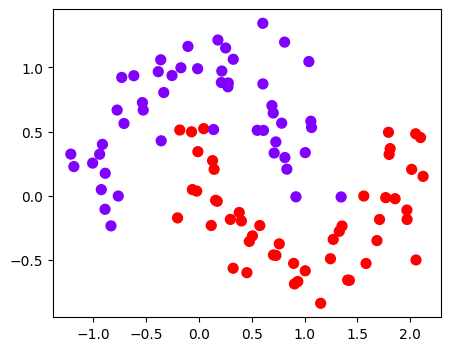

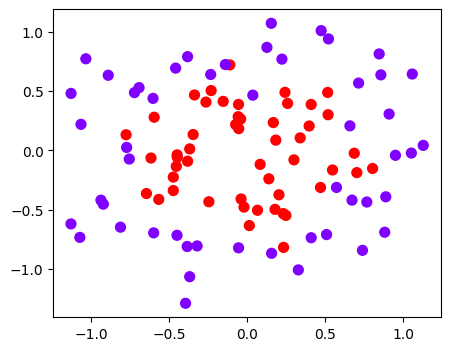

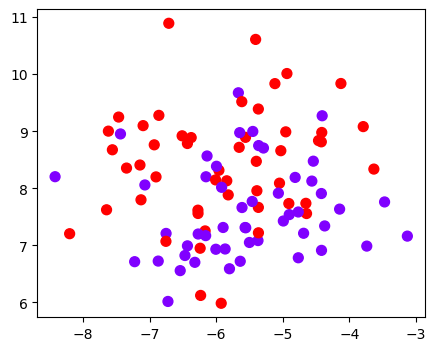

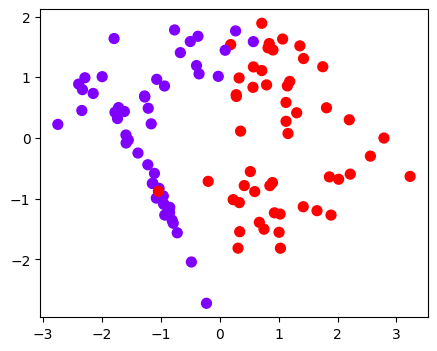

In [14]:
#四个数据集分别是什么样子呢？
for X, Y in datasets:
    plt.figure(figsize=(5, 4))
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap="rainbow")

In [15]:
nrows = len(datasets)
ncols = len(Kernel) + 1

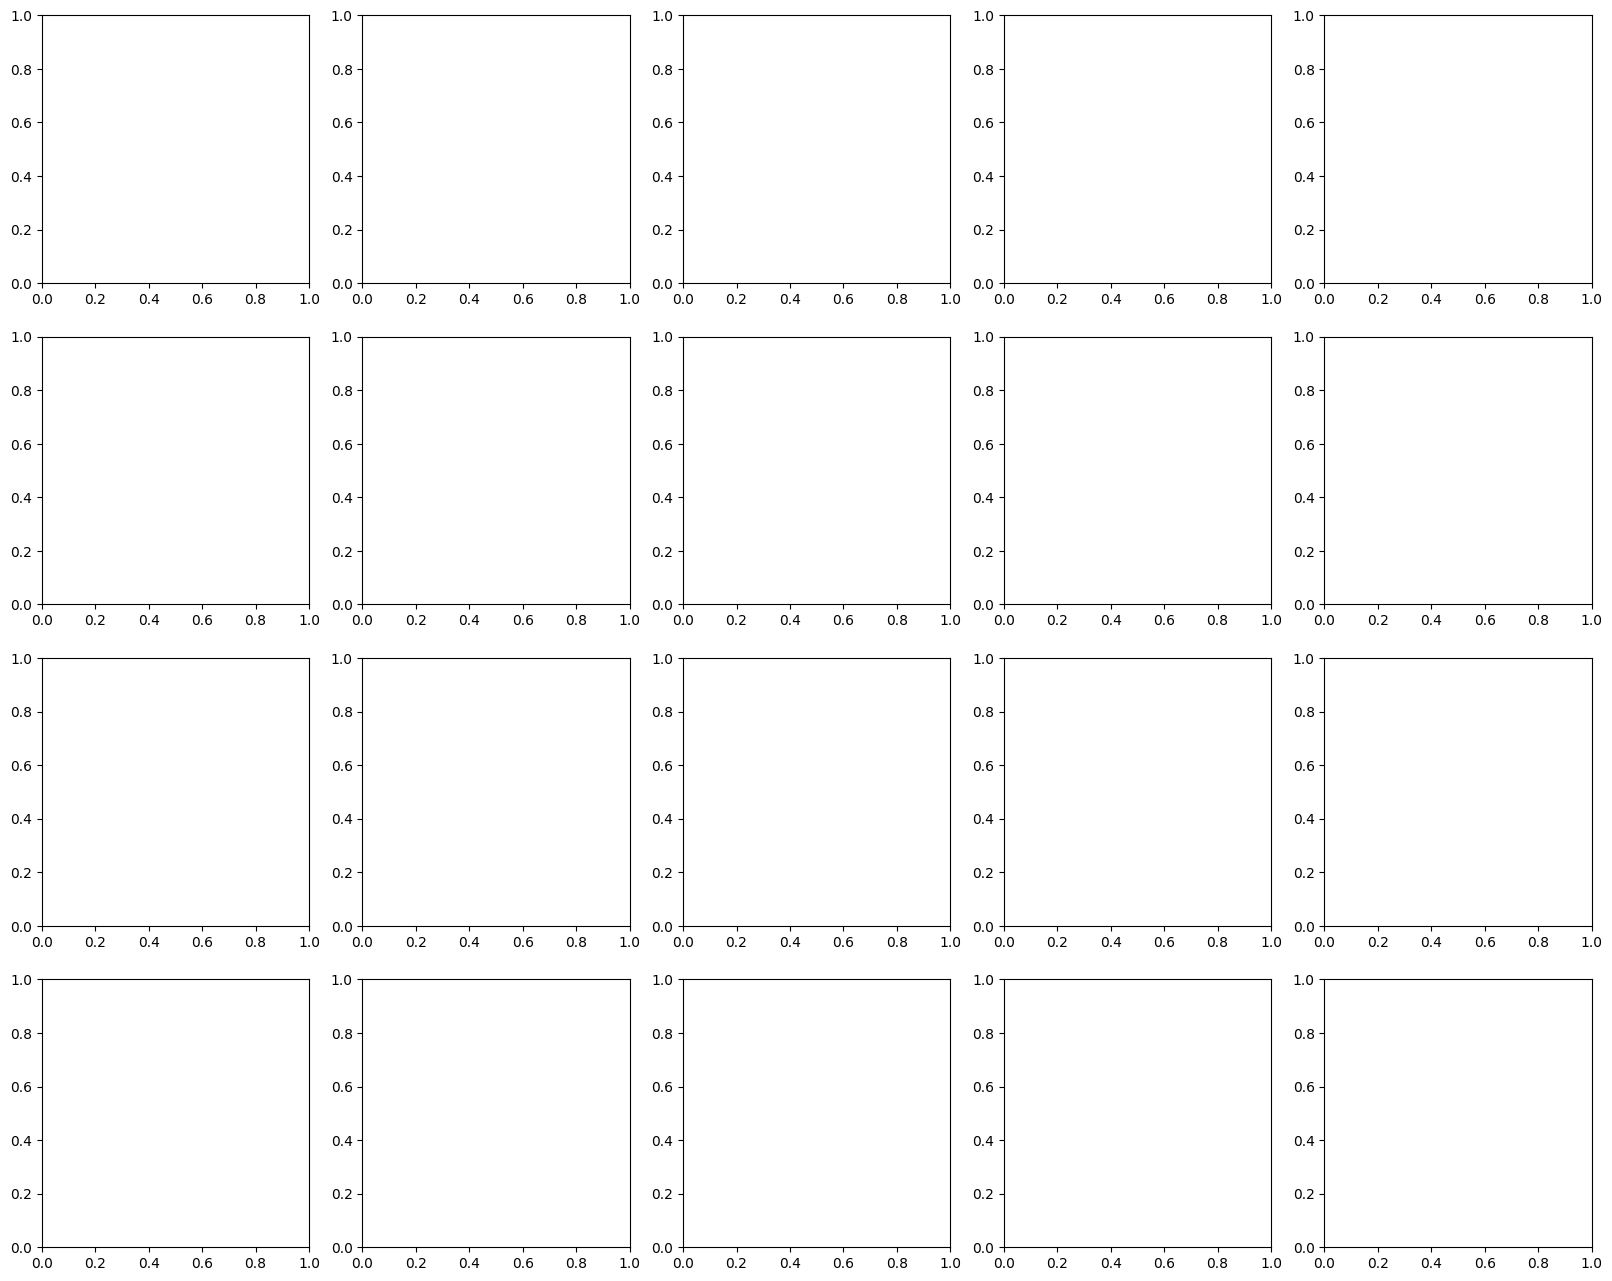

In [16]:
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 16))

C:\Users\25338\AppData\Local\Temp\ipykernel_14356\2396253100.py:47: UserWarning: No contour levels were found within the data range.
  ax.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],


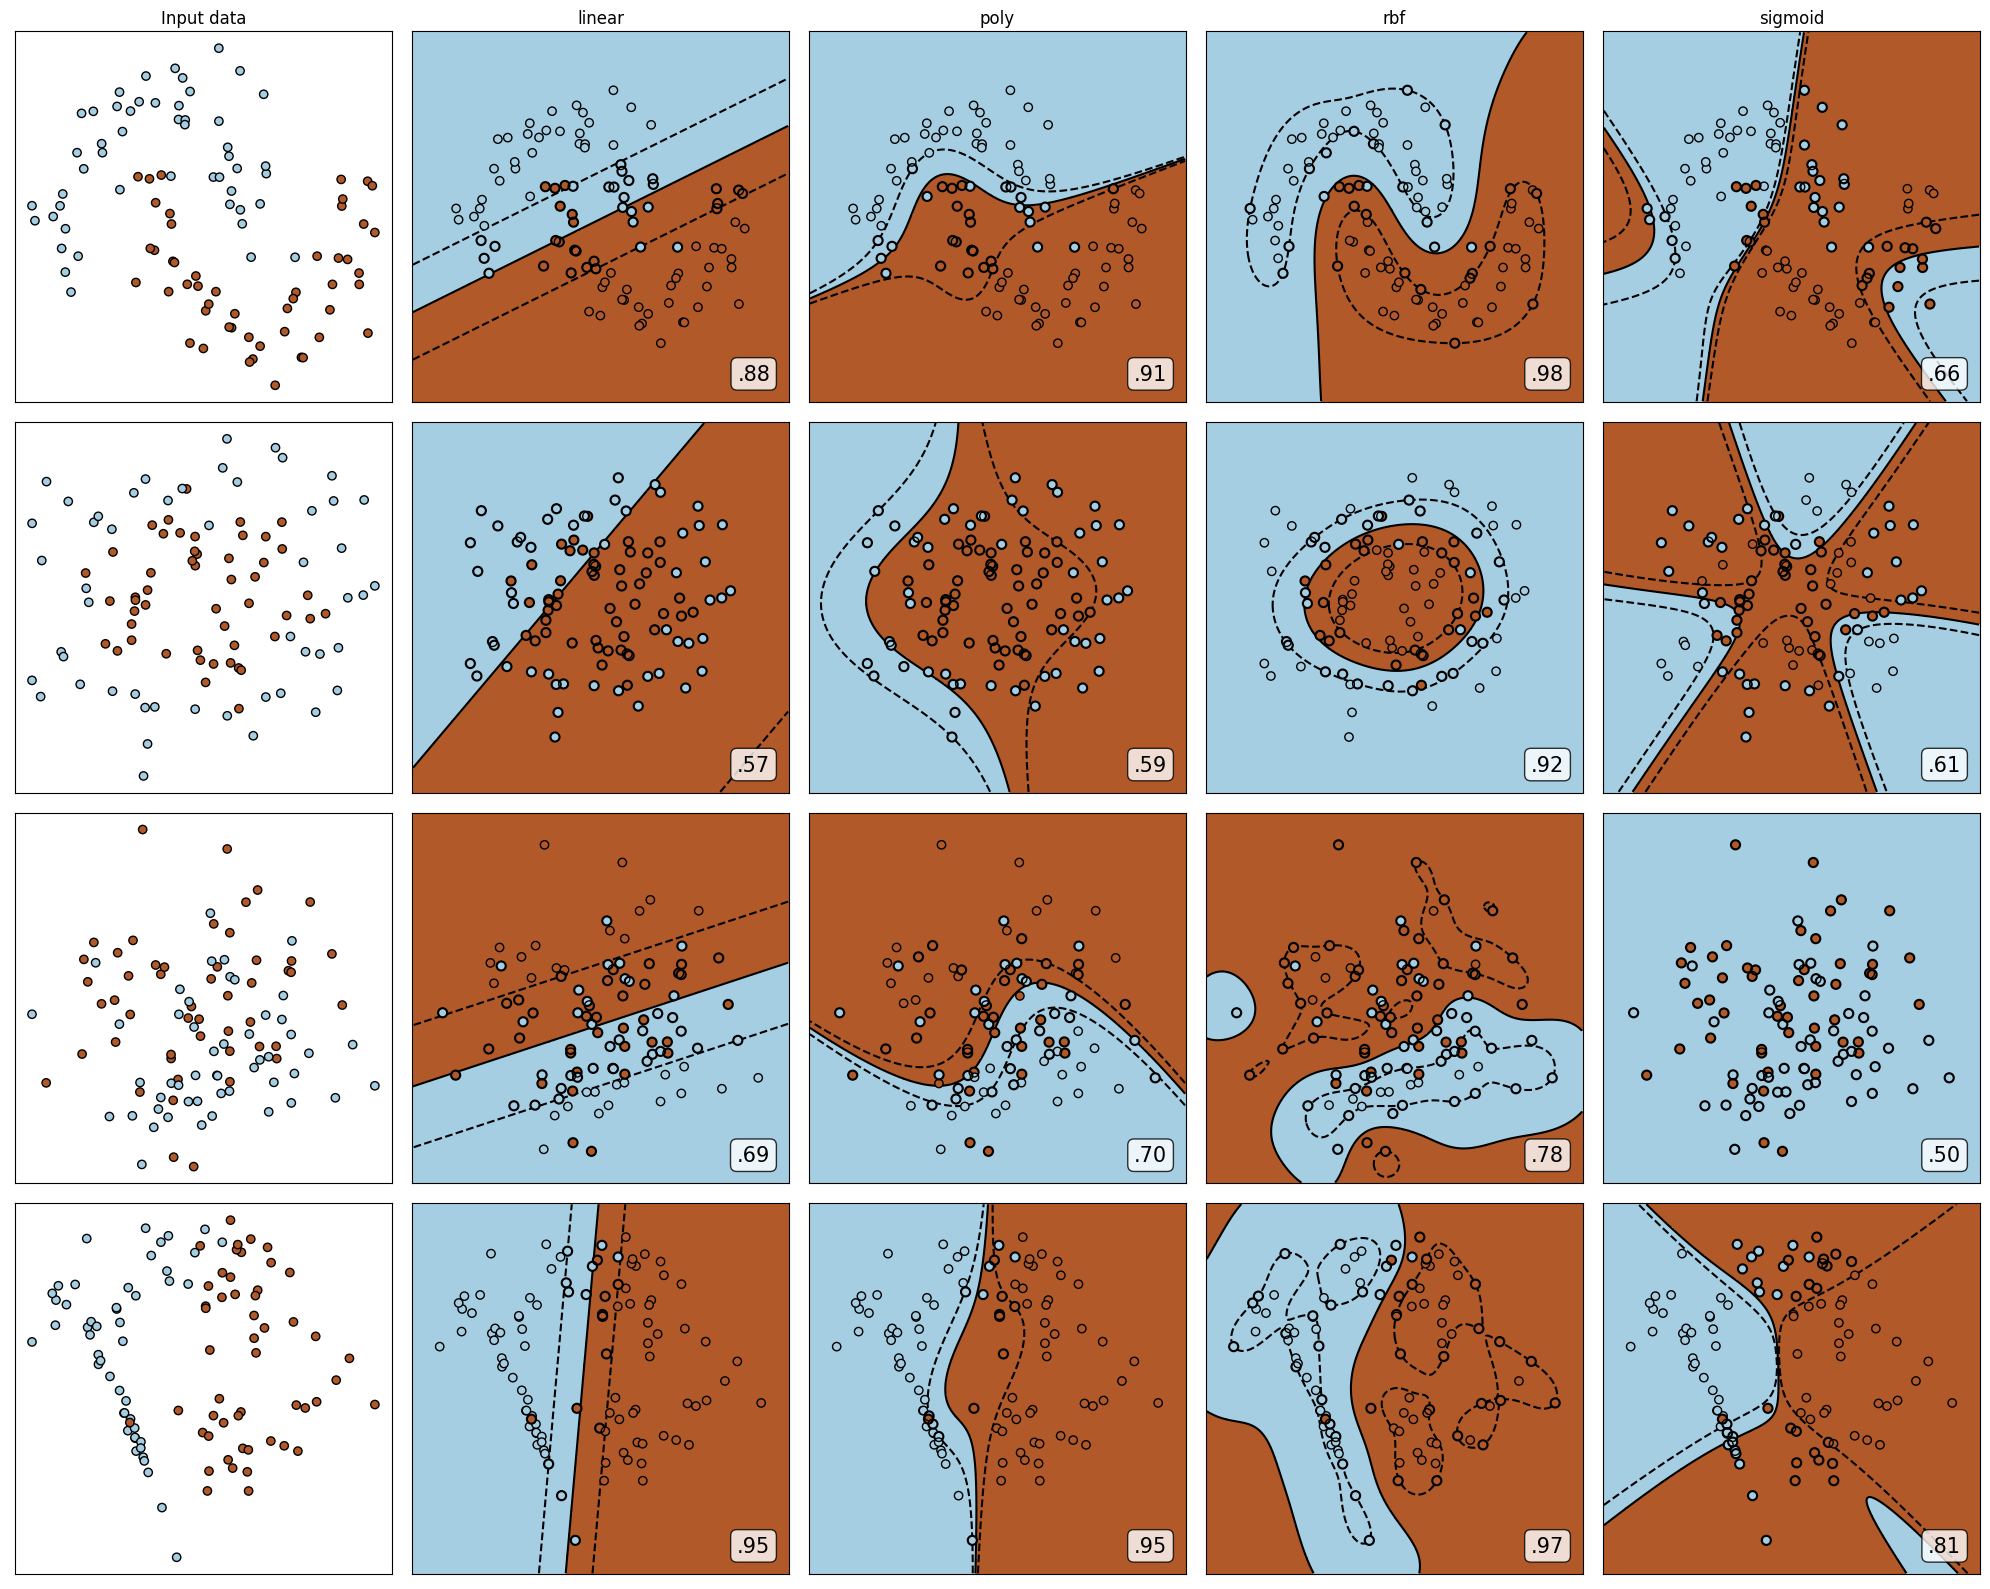

In [18]:
nrows = len(datasets)
ncols = len(Kernel) + 1
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 16))
#第一层循环：在不同的数据集中循环
for ds_cnt, (X, Y) in enumerate(datasets):

    #在图像中的第一列，放置原数据的分布
    ax = axes[ds_cnt, 0]
    if ds_cnt == 0:
        ax.set_title("Input data")
    ax.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired, edgecolors='k')
    ax.set_xticks(())
    ax.set_yticks(())

    #第二层循环：在不同的核函数中循环
    #从图像的第二列开始，一个个填充分类结果
    for est_idx, kernel in enumerate(Kernel):
        #定义子图位置
        ax = axes[ds_cnt, est_idx + 1]

        #建模
        clf = SVC(kernel=kernel, gamma=2).fit(X, Y)
        score = clf.score(X, Y)

        #绘制图像本身分布的散点图
        ax.scatter(X[:, 0], X[:, 1], c=Y
                   , zorder=10
                   , cmap=plt.cm.Paired, edgecolors='k')
        #绘制支持向量
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=50,
                   facecolors='none', zorder=10, edgecolors='k')

        #绘制决策边界
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

        #np.mgrid，合并了我们之前使用的np.linspace和np.meshgrid的用法
        #一次性使用最大值和最小值来生成网格
        #表示为[起始值：结束值：步长]
        #如果步长是复数，则其整数部分就是起始值和结束值之间创建的点的数量，并且结束值被包含在内
        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        #np.c_，类似于np.vstack的功能
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
        #填充等高线不同区域的颜色
        ax.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
        #绘制等高线
        ax.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                   levels=[-1, 0, 1])

        #设定坐标轴为不显示
        ax.set_xticks(())
        ax.set_yticks(())

        #将标题放在第一行的顶上
        if ds_cnt == 0:
            ax.set_title(kernel)

        #为每张图添加分类的分数
        ax.text(0.95, 0.06, ('%.2f' % score).lstrip('0')
                , size=15
                , bbox=dict(boxstyle='round', alpha=0.8, facecolor='white')
                #为分数添加一个白色的格子作为底色
                , transform=ax.transAxes  #确定文字所对应的坐标轴，就是ax子图的坐标轴本身
                , horizontalalignment='right'  #位于坐标轴的什么方向
                )
plt.tight_layout()
plt.show()